In [33]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re
from typing import List


# import file
movie_list = pd.read_csv('data/movie_list.csv')

# drop nulls
movie_list_real = movie_list.dropna()


# filter for person 1 picks
collin_picks = movie_list_real[movie_list_real["Chosen By"]=='Collin']


# count of person 1 picks
count_of_collin_picks = collin_picks.count()

print("Movies Collin has selected:", count_of_collin_picks)



Movies Collin has selected: Name                  40
Status                40
Completed             40
Collin Rating         40
Valerie Rating        40
Genre                 40
Source                40
Previously Seen By    40
Chosen By             40
imdb                  40
Release Date          40
dtype: int64


In [35]:

#mean watched decade

def get_year(date_str: str) -> str:
    return int(str(date_str)[-4:])  # Take the last 4 characters of each date string

# Apply the function to the "Release Date" column
movie_list_real["Release Year"] = movie_list_real["Release Date"].apply(get_year)

# Convert the 'Release Year' column to a single string
rd = movie_list_real["Release Year"].to_string()

# Remove last N characters from the single concatenated string
N = 4
Str2 = rd[-N:]

# Print results
# print("Concatenated Release Dates as String:", rd)
# print("Last 4 characters:", Str2)

#convert str to int for decade floor category 
def get_int(Str2: int) -> int:
        return int(Str2)

md= movie_list_real["Release Year"]

# create decade floor
decade_floor = np.floor(md / 10).astype(int)
movie_list_real["Decades"] = decade_floor * 10

# mean watched decade
mean_watched_decade = movie_list_real.groupby("Decades")["Release Year"].mean()
max_decade = mean_watched_decade.idxmax()  # Corrected to find the index (decade) of the max value

print("The mean decade is" , mean_watched_decade)


The mean decade is Decades
1970    1976.000000
1980    1984.166667
1990    1995.500000
2000    2004.500000
2010    2014.071429
2020    2022.458333
Name: Release Year, dtype: float64


C:\Users\19564\AppData\Local\Temp\ipykernel_5904\350215066.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_list_real["Release Year"] = movie_list_real["Release Date"].apply(get_year)
C:\Users\19564\AppData\Local\Temp\ipykernel_5904\350215066.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_list_real["Decades"] = decade_floor * 10


In [36]:
# decade breakdown 

# max decade
print("The max decade is",  max_decade)

oldest = movie_list_real["Release Year"].min()
recent = movie_list_real["Release Year"].max()

# oldest_movie
print("the most recent movie is from",recent )
print("the oldest movie is from", oldest)

# time spread
time_diff =  recent-oldest
print("The spread of time in years is", time_diff)

# person 1 most watched decade TODO

The max decade is 2020
the most recent movie is from 2024
the oldest movie is from 1976
The spread of time in years is 48


Decades
2000    32
2010    28
2020    24
1990    10
1980     6
1970     1
Name: count, dtype: int64

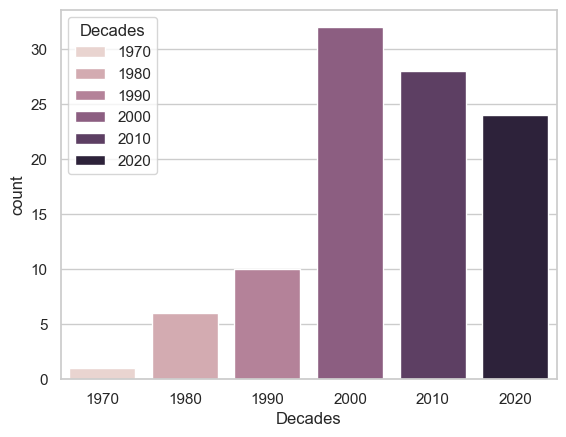

In [37]:
#  plot of decades watched

sns.countplot(x= movie_list_real["Decades"], hue = movie_list_real["Decades"])

movie_list_real["Decades"].value_counts()

C:\Users\19564\AppData\Local\Temp\ipykernel_5904\3768435069.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels = list , rotation=45)


[Text(0, 0, 'Peacock'),
 Text(1, 0, 'Netflix'),
 Text(2, 0, 'Max'),
 Text(3, 0, 'Paramount+'),
 Text(4, 0, 'Hulu'),
 Text(5, 0, 'Disney +'),
 Text(6, 0, 'Theater'),
 Text(7, 0, 'To Torrent'),
 Text(8, 0, 'Youtube'),
 Text(9, 0, 'Prime Video'),
 Text(10, 0, 'Bluray'),
 Text(11, 0, 'Torrent')]

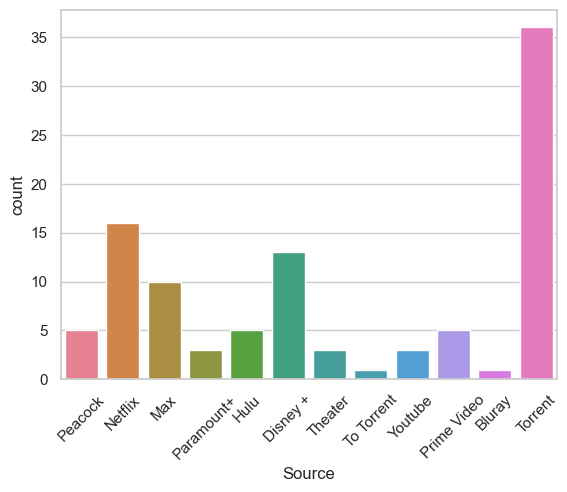

In [38]:
# # Count Plot of Movie Sources 
m= movie_list_real["Source"].value_counts()
m

movie_sources = (movie_list_real["Source"])
list = []

for val in movie_sources:
    if val not in list:
        list.append(val)

g= sns.countplot(data=movie_list_real, x = movie_list_real["Source"], hue = movie_list_real["Source"])
g.set_xticklabels(labels = list , rotation=45) 

<Axes: xlabel='Count', ylabel='Chosen By'>

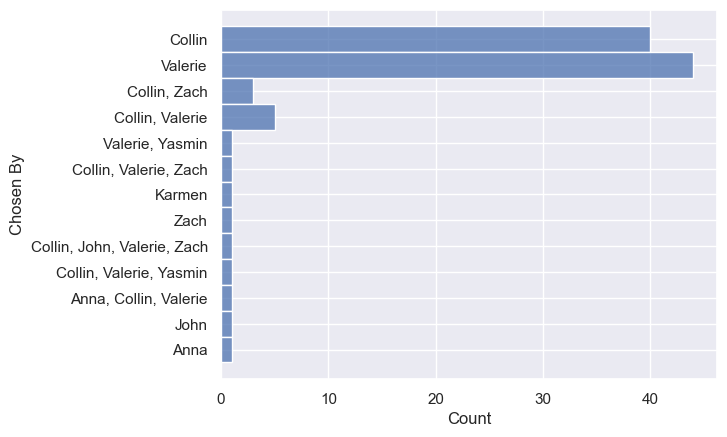

In [39]:
# # Histogram of picks per person
sns.set_theme(style="darkgrid")
sns.histplot(data = movie_list_real, y= movie_list_real["Chosen By"])


C:\Users\19564\AppData\Local\Temp\ipykernel_5904\4088278864.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels = movie_list_real["Completed"] , rotation=90)


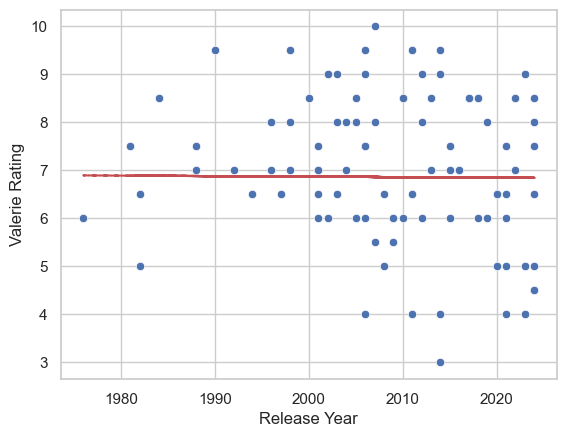

In [40]:
# movie_list_real
x=movie_list_real["Release Year"]
y= c_rating

# scatter plot
sns.set(style='whitegrid') 
sns.scatterplot(x=movie_list_real["Release Year"],
                    y=v_rating,
                    data=movie_list_real)
g.set_xticklabels(labels = movie_list_real["Completed"] , rotation=90) 
 

# trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")  # 'r--' is for a red dashed line
# movie_list_real

In [41]:
#  mean rating per genre
# movie_list_real["genre_mean"] = movie_list_real.groupby("Genre")["Collin Rating"].transform(lambda x: x.mean())
# print(movie_list_real[["Genre","genre_mean"]].value_counts(ascending=False))


# seperate genre categories TODO
# split string to get single values

movie_list_real["Genre"].value_counts()

movie_genre = str(movie_list_real["Genre"])

string = movie_genre
words = string.split(',')

genre_dict = {} # maps genre -> number of movies with that genre

for val in words:
    if val not in genre_dict:
        genre_dict[val] = 1
    else:
        genre_dict[val] += 1

print(genre_dict)
# movie_list_real["Single Genre"] = list

# first for loop to iterate over each title
for elem in movie_list_real:
    movie_list_real["Genre"].apply(words)
for elem in words:
    if elem not in genre_dict:
        genre_dict[val] = 1
    else:
        genre_dict[val] += 1


{'0       Horror': 1, ' Thriller\n1                 Horror\n2         Drama': 1, ' Romance\n3                 Horror\n4       Horror': 1, ' Thriller\n             ...        \n104                Drama\n105    Mystery': 1, ' Thriller\n106               Action\n107       Comedy': 1, ' Family\n108      Comedy': 1, ' Romance\nName: Genre': 1, ' Length: 101': 1, ' dtype: object': 1}


AttributeError: '0       Horror' is not a valid function for 'Series' object

In [ ]:
# exploring outliers
print(movie_list_real["Completed"].describe())

count                 101
unique                 95
top       October 6, 2024
freq                    2
Name: Completed, dtype: object


In [ ]:
# select movie list title where valerie rating = 10 TODO
for elem in movie_list_real:
    print("Valerie rated", movie_list_real["Name"],v_rating.head(10))

Valerie rated 0                                   Us
1                            Annabelle
2                        Up in the Air
3                        The Conjuring
4                        A Quiet Place
                    ...               
104      Once Upon A Time in Hollywood
105    The Girl With the Dragon Tattoo
106                             Nimona
107                           Spy Kids
108                 The Wedding Singer
Name: Name, Length: 101, dtype: object 0    8.0
1    4.0
2    5.5
3    7.0
4    8.5
5    8.5
6    7.0
7    4.5
8    5.0
9    5.5
Name: Valerie Rating, dtype: float64
Valerie rated 0                                   Us
1                            Annabelle
2                        Up in the Air
3                        The Conjuring
4                        A Quiet Place
                    ...               
104      Once Upon A Time in Hollywood
105    The Girl With the Dragon Tattoo
106                             Nimona
107                       

C:\Users\19564\AppData\Local\Temp\ipykernel_2940\3144963881.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels = movie_list_real["Completed"] , rotation=90)


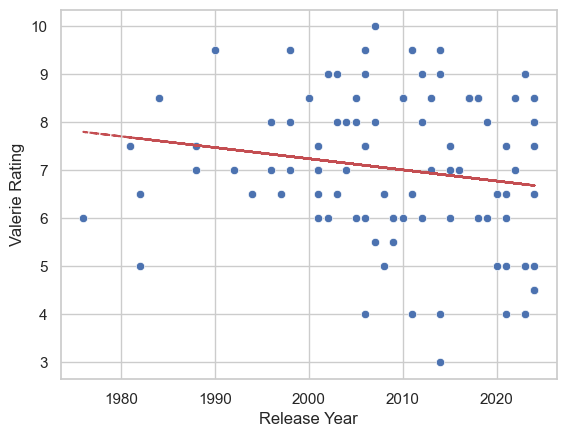

In [ ]:

# movie_list_real
x=movie_list_real["Release Year"]
y= v_rating

# scatter plot
sns.set(style='whitegrid') 
sns.scatterplot(x=movie_list_real["Release Year"],
                    y=v_rating,
                    data=movie_list_real)
g.set_xticklabels(labels = movie_list_real["Completed"] , rotation=90) 
 

# trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")  # 'r--' is for a red dashed line



In [ ]:
# CORRELATION GENRE V RATING
# need single worded genre
# list with single word genre
results = []

# Iterate through each row in the DataFrame
for index, row in movie_list_real.iterrows():
    # Split genres and append each to results
    for genre in row["Genre"].split(","):
        results.append(genre.strip())  # Clean up extra spaces


# create DF from results list
genre_list = df = pd.DataFrame(data=results)

# Add each val to the new list if it doesn't already exist
for val in genre_list:
    if val not in results:
        results.append(val)

# remove duplicates
genre_list.drop_duplicates()


# count of single genres
genre_counts =genre_list.value_counts()


# # Print the genres list
print("Genres List:", genre_counts)



Genres List: 0          
Comedy         57
Family         30
Drama          21
Musical        13
Horror          9
Action          9
Adventure       8
Thriller        7
Bizarro         5
Romance         5
Stoner          4
Documentary     2
Arthouse        1
Mystery         1
Name: count, dtype: int64


In [ ]:
# rating per genre 

# genre_info = pd.DataFrame(data=genre_counts)

# genre_info["Collin_rating"] = movie_list_real["Collin Rating"]


# find mean of c_rating per genre
# sum of scores per genre / count of genre 




,count,Collin_rating
0,,
Comedy,57,NaN
Family,30,NaN
Drama,21,NaN
Musical,13,NaN
Horror,9,NaN
Action,9,NaN
Adventure,8,NaN
Thriller,7,NaN
Bizarro,5,NaN
